In [1]:
import pandas as pd

Loading data from csv file

In [3]:
df = pd.read_csv('heart.csv', sep=';')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Creating target and inputs dataframes

In [23]:
target = df['output']
inputs = df.drop('output', axis='columns')
target.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

Processing age

In [11]:
inputs.loc[inputs["age"] <= 30, "age"] = 0
inputs.loc[(inputs["age"] > 30) & (inputs["age"] <= 40), "age"] = 1
inputs.loc[(inputs["age"] > 40) & (inputs["age"] <= 50), "age"] = 2
inputs.loc[(inputs["age"] > 50) & (inputs["age"] <= 60), "age"] = 3
inputs.loc[(inputs["age"] > 60) & (inputs["age"] <= 70), "age"] = 4
inputs.loc[inputs["age"] > 70, "age"] = 5

inputs.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,4,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,1,2,130,250,0,1,187,0,3.5,0,0,2
2,2,0,1,130,204,0,0,172,0,1.4,2,0,2
3,3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,3,0,0,120,354,0,1,163,1,0.6,2,0,2


Processing resting blood pressure

In [12]:
inputs.loc[inputs["trtbps"] <= 115, "trtbps"] = 0
inputs.loc[(inputs["trtbps"] > 115) & (inputs["trtbps"] <= 147), "trtbps"] = 1
inputs.loc[inputs["trtbps"] > 147, "trtbps"] = 2

inputs.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,4,1,3,1,233,1,0,150,0,2.3,0,0,1
1,1,1,2,1,250,0,1,187,0,3.5,0,0,2
2,2,0,1,1,204,0,0,172,0,1.4,2,0,2
3,3,1,1,1,236,0,1,178,0,0.8,2,0,2
4,3,0,0,1,354,0,1,163,1,0.6,2,0,2


Processing cholestoral level

In [13]:
inputs.loc[inputs["chol"] <= 180, "chol"] = 0
inputs.loc[(inputs["chol"] > 180) & (inputs["chol"] <= 300), "chol"] = 1
inputs.loc[inputs["chol"] > 300, "chol"] = 2

inputs.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,4,1,3,1,1,1,0,150,0,2.3,0,0,1
1,1,1,2,1,1,0,1,187,0,3.5,0,0,2
2,2,0,1,1,1,0,0,172,0,1.4,2,0,2
3,3,1,1,1,1,0,1,178,0,0.8,2,0,2
4,3,0,0,1,2,0,1,163,1,0.6,2,0,2


Processing maximum heart rate achieved

In [14]:
inputs.loc[inputs["thalachh"] <= 120, "thalachh"] = 0
inputs.loc[(inputs["thalachh"] > 120) & (inputs["thalachh"] <= 175), "thalachh"] = 1
inputs.loc[inputs["thalachh"] > 175, "thalachh"] = 2

inputs.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,4,1,3,1,1,1,0,1,0,2.3,0,0,1
1,1,1,2,1,1,0,1,2,0,3.5,0,0,2
2,2,0,1,1,1,0,0,1,0,1.4,2,0,2
3,3,1,1,1,1,0,1,2,0,0.8,2,0,2
4,3,0,0,1,2,0,1,1,1,0.6,2,0,2


Deleting oldpeak, slp, caa columns

In [17]:
new_inputs = inputs.drop(['oldpeak', 'slp', 'caa'], axis=1)
new_inputs.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,thall
0,4,1,3,1,1,1,0,1,0,1
1,1,1,2,1,1,0,1,2,0,2
2,2,0,1,1,1,0,0,1,0,2
3,3,1,1,1,1,0,1,2,0,2
4,3,0,0,1,2,0,1,1,1,2


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
var_train, var_test, res_train, res_test = train_test_split(new_inputs, target, test_size = 0.3)

In [18]:
from sklearn import tree

Creating model decision tree with criterion entropy 
(entropy is a measure of disorder)

In [38]:
model = tree.DecisionTreeClassifier(criterion='entropy')

In [39]:
model.fit(var_train, res_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
res_pred = model.predict(var_test)
score = accuracy_score(res_test, res_pred)

In [42]:
score

0.6593406593406593

In [33]:
import matplotlib.pyplot as plt

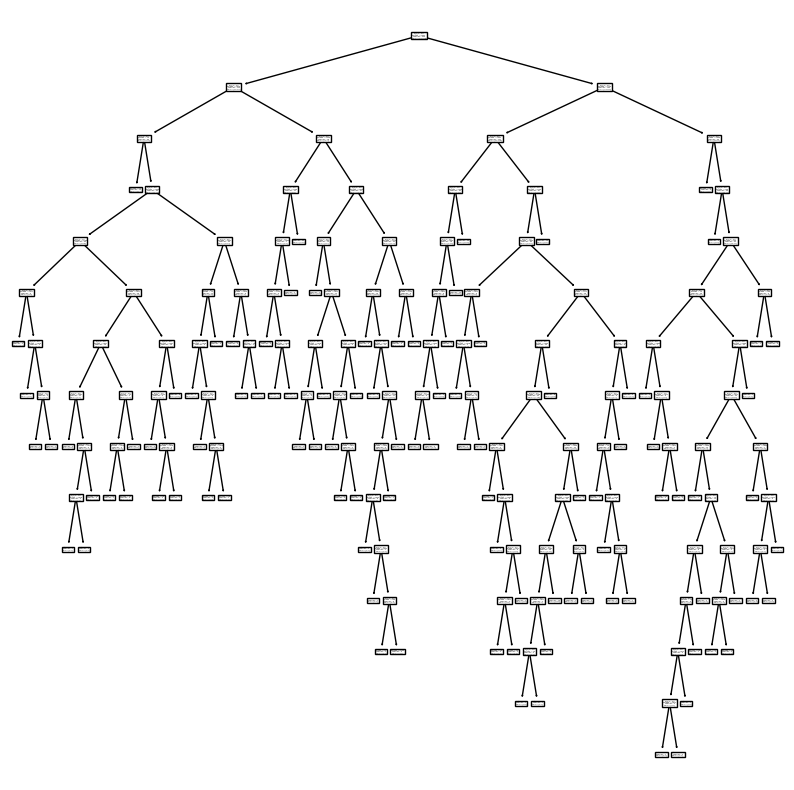

In [35]:
fig = plt.figure(figsize=(10,10))
plot = tree.plot_tree(model)

To predict risk of heart atack use command:

model.predict(X=[[]])

and fill list with 10 paramiters:
1. age:
    - less than 30 -> 0
    - (30 - 40] -> 1
    - (40 - 50] -> 2
    - (50 - 60] -> 3    
    - (60 - 70] -> 4
    - more than 70 -> 5
2. sex:
    - female -> 0
    - male -> 1
3. chest pain type:
    - typical angina -> 0
    - atypical angina -> 1
    - non-anginal pain -> 2
    - asymptomatic -> 3
4. resting blood pressure:
    - less than 115 -> 0
    - (115 - 147] -> 1
    - more than 147 -> 2
5. cholestoral in mg/dl fetched via BMI sensor:
    - less than 180 -> 0
    - (180 - 300] -> 1
    - more than 300 -> 2
6. fasting blood sugar > 120:
    - false -> 0
    - true -> 1
7. resting electrocardiographic results:
    - normal -> 0
    - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -> 1
    - showing probable or definite left ventricular hypertrophy by Estes' criteria -> 2
8. maximum heart rate achieved:
    - less than 120 -> 0
    - (120 - 175] -> 1
    - more than 175 -> 2
9. exercise induced angina:
    - no -> 0
    - yes -> 1
10. thalassemia:
    - no -> 0
    - yes -> 1
